In [16]:
import torch
import matplotlib.pyplot as plt

# Q1

1. For the following training data, build a linear regression model. Assume w and b are initialized with 1 and learning parameter is set to 0.001.

x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])

y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

Assume learning rate =0.001. Plot the graph of epoch in x axis and loss in y axis.

In [74]:
x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

In [75]:
w= torch.tensor([1.0], requires_grad=True)
b= torch.tensor([1.0], requires_grad=True)
lr= torch.tensor(0.001)
loss_history=[]

0: delw = tensor([112.2217]), delb= tensor([6.3304])
1: delw = tensor([42.2868]), delb= tensor([2.3978])
2: delw = tensor([15.9339]), delb= tensor([0.9159])
3: delw = tensor([6.0035]), delb= tensor([0.3575])
4: delw = tensor([2.2616]), delb= tensor([0.1471])
5: delw = tensor([0.8515]), delb= tensor([0.0678])
6: delw = tensor([0.3202]), delb= tensor([0.0379])
7: delw = tensor([0.1199]), delb= tensor([0.0267])
8: delw = tensor([0.0445]), delb= tensor([0.0224])
9: delw = tensor([0.0161]), delb= tensor([0.0208])


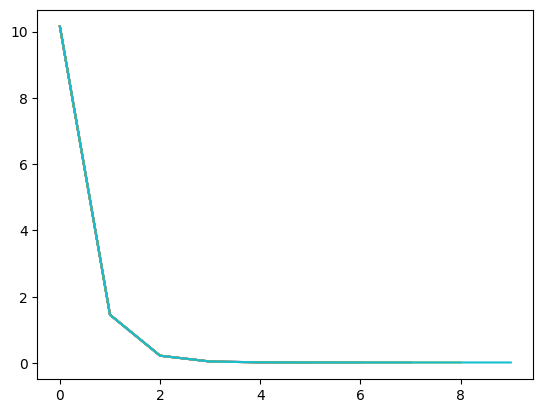

In [76]:
for epoch in range(10):
    loss=0.0
    for j in range(len(x)):
        loss+=(y[j]-(x[j]*w+b))**2
    mse=loss/len(x)
    loss_history.append(mse.item())
    mse.backward()
    print(f"{epoch}: delw = {w.grad}, delb= {b.grad}")
    with torch.no_grad():
        w-= lr*w.grad
        b-= lr*b.grad
        w.grad.zero_()
        b.grad.zero_()
    plt.plot(loss_history)
plt.show()
        

# Q2

Find the value of w.grad, b.grad using analytical solution for the given linear regression
problem. Initial value of w = b =1. Learning parameter is set to 0.001. Implement the same
and verify the values of w.grad , b.grad and updated parameter values for two epochs.
Consider the difference between predicted and target values of y is defined as (yp-y).

x= 2,4
y= 20,40

In [79]:
x = torch.tensor([2.0, 4.0])
y = torch.tensor([20.0, 40.0])
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
lr = 0.001

for epoch in range(2):
    y_pred = w * x + b
    loss = ((y_pred - y) ** 2).mean()

    grad_w = (-2 * (x * (y - y_pred))).mean()
    grad_b = (-2 * (y - y_pred)).mean()

    print(f"Epoch {epoch + 1}:")
    print(f"  grad_w = {grad_w.item()}, grad_b = {grad_b.item()}")

    with torch.no_grad():
        w -= lr * grad_w
        b -= lr * grad_b

    print(f"  Updated w = {w.item()}, Updated b = {b.item()}")


Epoch 1:
  grad_w = -174.0, grad_b = -52.0
  Updated w = 1.1740000247955322, Updated b = 1.0520000457763672
Epoch 2:
  grad_w = -170.20799255371094, grad_b = -50.85199737548828
  Updated w = 1.344208002090454, Updated b = 1.1028521060943604


# Q3

Epoch 1/100
Weight Gradient (w): -4170.400390625
Bias Gradient (b): -290.0
Epoch 2/100
Weight Gradient (w): -2705.4677734375
Bias Gradient (b): -189.33038330078125
Epoch 3/100
Weight Gradient (w): -1755.0924072265625
Bias Gradient (b): -124.0204849243164
Epoch 4/100
Weight Gradient (w): -1138.5355224609375
Bias Gradient (b): -81.65022277832031
Epoch 5/100
Weight Gradient (w): -738.5439453125
Bias Gradient (b): -54.162078857421875
Epoch 6/100
Weight Gradient (w): -479.04876708984375
Bias Gradient (b): -36.328678131103516
Epoch 7/100
Weight Gradient (w): -310.7013854980469
Bias Gradient (b): -24.758846282958984
Epoch 8/100
Weight Gradient (w): -201.48617553710938
Bias Gradient (b): -17.25250816345215
Epoch 9/100
Weight Gradient (w): -130.63226318359375
Bias Gradient (b): -12.382315635681152
Epoch 10/100
Weight Gradient (w): -84.66617584228516
Bias Gradient (b): -9.22238540649414
Epoch 11/100
Weight Gradient (w): -54.845314025878906
Bias Gradient (b): -7.171936988830566
Epoch 12/100
Weigh

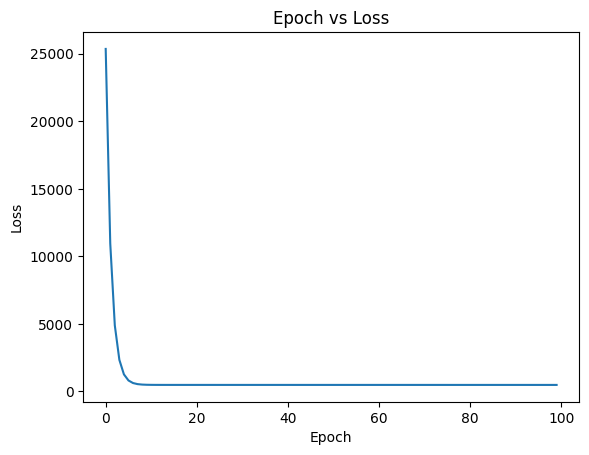

Final w: 12.85075855255127, Final b: 2.150007724761963


In [82]:
import torch
import matplotlib.pyplot as plt

class RegressionModel:
    def __init__(self):
        self.w = torch.tensor(1.0, requires_grad=True)  
        self.b = torch.tensor(1.0, requires_grad=True)  

    def forward(self, x):
        return self.w * x + self.b

    def update(self, lr):
        with torch.no_grad():
            self.w -= lr * self.w.grad
            self.b -= lr * self.b.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

    def criterion(self, y, yp):
        return ((yp - y) ** 2).mean()

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = 0.001

model = RegressionModel()

loss_history = []

epochs = 100
for epoch in range(epochs):
    yp = model.forward(x)

    loss = model.criterion(y, yp)
    loss_history.append(loss.item())  

    loss.backward()
    
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Weight Gradient (w): {model.w.grad.item()}")
    print(f"Bias Gradient (b): {model.b.grad.item()}")

    model.update(learning_rate)

    model.reset_grad()

plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.show()

print(f"Final w: {model.w.item()}, Final b: {model.b.item()}")


# Q4

Epoch 1/100
Weight Gradient (w): -353.30145263671875
Bias Gradient (b): -70.66029357910156
Epoch 1/100
Weight Gradient (w): -8636.32421875
Bias Gradient (b): -431.81622314453125
Epoch 1/100
Weight Gradient (w): -1469.255859375
Bias Gradient (b): -122.43798828125
Epoch 1/100
Weight Gradient (w): -907.3232421875
Bias Gradient (b): -56.70770263671875
Epoch 1/100
Weight Gradient (w): -468.2585144042969
Bias Gradient (b): -66.89407348632812
Epoch 2/100
Weight Gradient (w): -421.43267822265625
Bias Gradient (b): -60.20466613769531
Epoch 2/100
Weight Gradient (w): 267.58056640625
Bias Gradient (b): 53.51611328125
Epoch 2/100
Weight Gradient (w): -120.08447265625
Bias Gradient (b): -7.505279541015625
Epoch 2/100
Weight Gradient (w): 795.43701171875
Bias Gradient (b): 39.7718505859375
Epoch 2/100
Weight Gradient (w): -794.8436279296875
Bias Gradient (b): -66.23696899414062
Epoch 3/100
Weight Gradient (w): -564.3387451171875
Bias Gradient (b): -47.028228759765625
Epoch 3/100
Weight Gradient (w):

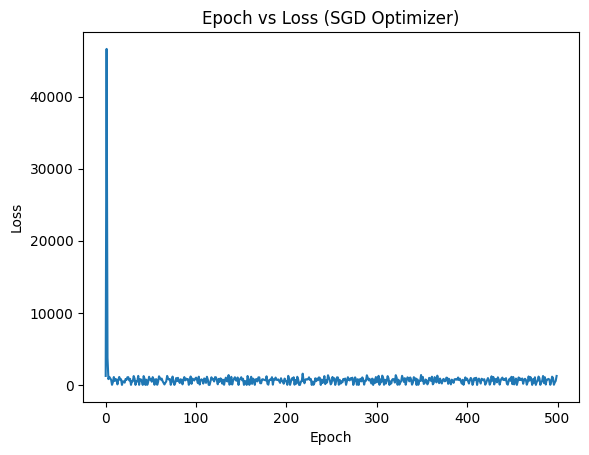

Final w: 12.615039825439453, Final b: 3.6044957637786865


In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

class LinearRegressionDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  

    def forward(self, x):
        return self.linear(x)

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0]).view(-1, 1) 
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0]).view(-1, 1)

dataset = LinearRegressionDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

model = RegressionModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

loss_history = []

for epoch in range(100):
    for inputs, targets in dataloader:
        yp = model(inputs)

        loss = criterion(yp, targets)
        loss_history.append(loss.item())

        optimizer.zero_grad()  
        loss.backward()
        
        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Weight Gradient (w): {model.linear.weight.grad.item()}")
        print(f"Bias Gradient (b): {model.linear.bias.grad.item()}")

        optimizer.step()

plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss (SGD Optimizer)")
plt.show()

print(f"Final w: {model.linear.weight.item()}, Final b: {model.linear.bias.item()}")


# Q5

Epoch 1/100
Weight Gradient (w): -4479.49072265625
Bias Gradient (b): -311.5904235839844
Epoch 2/100
Weight Gradient (w): -2905.982177734375
Bias Gradient (b): -203.45947265625
Epoch 3/100
Weight Gradient (w): -1885.167724609375
Bias Gradient (b): -133.3089599609375
Epoch 4/100
Weight Gradient (w): -1222.913330078125
Bias Gradient (b): -87.7983169555664
Epoch 5/100
Weight Gradient (w): -793.2755126953125
Bias Gradient (b): -58.27278137207031
Epoch 6/100
Weight Gradient (w): -514.5477294921875
Bias Gradient (b): -39.11761474609375
Epoch 7/100
Weight Gradient (w): -333.72332763671875
Bias Gradient (b): -26.69025421142578
Epoch 8/100
Weight Gradient (w): -216.4132080078125
Bias Gradient (b): -18.627519607543945
Epoch 9/100
Weight Gradient (w): -140.30795288085938
Bias Gradient (b): -13.396339416503906
Epoch 10/100
Weight Gradient (w): -90.93461608886719
Bias Gradient (b): -10.002145767211914
Epoch 11/100
Weight Gradient (w): -58.903621673583984
Bias Gradient (b): -7.7996978759765625
Epoch

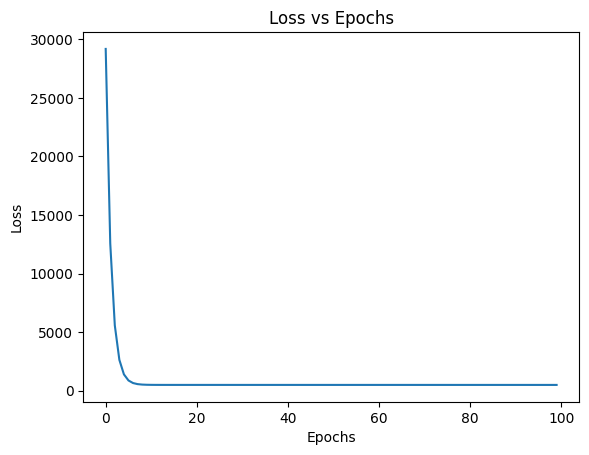

Final weight: 12.916675567626953
Final bias: 1.190786361694336


In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0]).view(-1, 1) 
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0]).view(-1, 1)

model = LinearRegressionModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 100
loss_history = []

for epoch in range(epochs):
    yp = model(x)

    loss = criterion(yp, y)
    loss_history.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Weight Gradient (w): {model.linear.weight.grad.item()}")
    print(f"Bias Gradient (b): {model.linear.bias.grad.item()}")
    
    optimizer.step()

plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

print(f"Final weight: {model.linear.weight.item()}")
print(f"Final bias: {model.linear.bias.item()}")


# Q6

Epoch 1/100
Weight Gradient (w): tensor([[-120.8833, -170.5208]])
Bias Gradient (b): tensor([-49.6376])
Epoch 2/100
Weight Gradient (w): tensor([[-113.1514, -160.6003]])
Bias Gradient (b): tensor([-47.4488])
Epoch 3/100
Weight Gradient (w): tensor([[-105.8806, -151.2708]])
Bias Gradient (b): tensor([-45.3902])
Epoch 4/100
Weight Gradient (w): tensor([[ -99.0433, -142.4973]])
Bias Gradient (b): tensor([-43.4540])
Epoch 5/100
Weight Gradient (w): tensor([[ -92.6137, -134.2465]])
Bias Gradient (b): tensor([-41.6329])
Epoch 6/100
Weight Gradient (w): tensor([[ -86.5675, -126.4874]])
Bias Gradient (b): tensor([-39.9199])
Epoch 7/100
Weight Gradient (w): tensor([[ -80.8818, -119.1906]])
Bias Gradient (b): tensor([-38.3088])
Epoch 8/100
Weight Gradient (w): tensor([[ -75.5352, -112.3286]])
Bias Gradient (b): tensor([-36.7934])
Epoch 9/100
Weight Gradient (w): tensor([[ -70.5075, -105.8754]])
Bias Gradient (b): tensor([-35.3679])
Epoch 10/100
Weight Gradient (w): tensor([[-65.7796, -99.8068]])

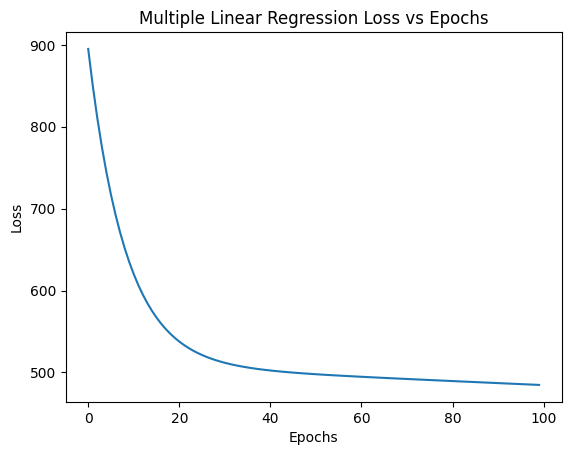

Prediction for X1=3, X2=2: 13.32828140258789


In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

X = torch.tensor([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]], dtype=torch.float32)
y = torch.tensor([53, 28, 11.5, 5.7, 30], dtype=torch.float32).view(-1, 1)

class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super(MultipleLinearRegression, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

model = MultipleLinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 100
loss_history = []

for epoch in range(epochs):
    yp = model(X)

    loss = criterion(yp, y)
    loss_history.append(loss.item())

    optimizer.zero_grad()
    loss.backward()

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Weight Gradient (w): {model.linear.weight.grad}")
    print(f"Bias Gradient (b): {model.linear.bias.grad}")

    optimizer.step()

plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Multiple Linear Regression Loss vs Epochs')
plt.show()

test_input = torch.tensor([[3.0, 2.0]], dtype=torch.float32)
prediction = model(test_input)
print(f"Prediction for X1=3, X2=2: {prediction.item()}")


# Q7

Epoch 1/200
Weight Gradient (w): 5.538434982299805
Bias Gradient (b): 0.47918516397476196
Epoch 2/200
Weight Gradient (w): 5.514256000518799
Bias Gradient (b): 0.4737749695777893
Epoch 3/200
Weight Gradient (w): 5.481379985809326
Bias Gradient (b): 0.4671682119369507
Epoch 4/200
Weight Gradient (w): 5.435957431793213
Bias Gradient (b): 0.45895522832870483
Epoch 5/200
Weight Gradient (w): 5.372316360473633
Bias Gradient (b): 0.44857266545295715
Epoch 6/200
Weight Gradient (w): 5.282382488250732
Bias Gradient (b): 0.43526798486709595
Epoch 7/200
Weight Gradient (w): 5.155447959899902
Bias Gradient (b): 0.41812118887901306
Epoch 8/200
Weight Gradient (w): 4.978524684906006
Bias Gradient (b): 0.3962039351463318
Epoch 9/200
Weight Gradient (w): 4.7354607582092285
Bias Gradient (b): 0.3688627779483795
Epoch 10/200
Weight Gradient (w): 4.396849155426025
Bias Gradient (b): 0.335752934217453
Epoch 11/200
Weight Gradient (w): 3.882511854171753
Bias Gradient (b): 0.2960115671157837
Epoch 12/200
W

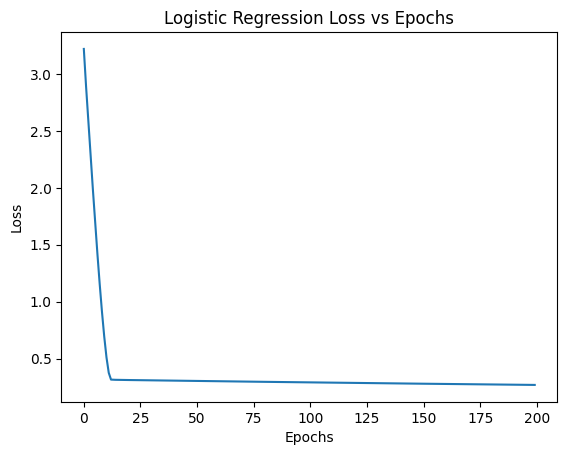

Prediction for X = 15: 0.38014689087867737


In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32).view(-1, 1)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32).view(-1, 1)

class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  
model = LogisticRegressionModel()
criterion = nn.BCELoss() 
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 200
loss_history = []

for epoch in range(epochs):
    yp = model(x) 

    loss = criterion(yp, y)  
    loss_history.append(loss.item())  

    optimizer.zero_grad()  
    loss.backward()  

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Weight Gradient (w): {model.linear.weight.grad.item()}")
    print(f"Bias Gradient (b): {model.linear.bias.grad.item()}")

    optimizer.step() 

plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Logistic Regression Loss vs Epochs')
plt.show()

test_input = torch.tensor([[15.0]], dtype=torch.float32)
prediction = model(test_input)
print(f"Prediction for X = 15: {prediction.item()}")
